In [1]:
#!python -m pip install --upgrade pip

#!pip install tensorflow

#!pip install tensorboard

#!pip install torch  

#!pip install protobuf==3.20.0

#!pip install --upgrade numpy




ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached grpcio-1.60.1-cp312-cp312-win_amd64.whl.metadata (4.2 kB)
  Using cached Markdown-3.5.2-py3-none-any.whl.metadata (7.0 kB)
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.1-py3-none-any.whl.metadata (4.1 kB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached grpcio-1.60.1-cp312-cp312-win_amd64.whl (3.7 MB)
Using cached Markdown-3.5.2-py3-none-any.whl (103 kB)
Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl (413 kB)
Using cached tensorboard_data_server-0.7.2-py3-none-any.whl (2.4 kB)
Using cached werkzeug-3.0.1-py3-none-any.whl (226 kB)
  Using cached protobuf-3.20.0-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf


In [2]:
!set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [3]:
import torch # YOLOv5 implemented using pytorch

In [4]:
%cd yolov5
!pip install -r requirements.txt

d:\DSGP\yolov5_t3\yolov5


d:\DSGP\yolov5_t3\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Divide the dataset in Train and Val folders


In [2]:

import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '../yolov5_t3/dataset/images/train'
valPath = '../yolov5_t3/dataset/images/val'
crsPath = '../yolov5_t3/data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.7
val_ratio = 0.3


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  375
Validation images are :  160


In [7]:

trainimagePath = '../yolov5_t3/dataset/images/train'
trainlabelPath = '../yolov5_t3/dataset/labels/train'
valimagePath = '../yolov5_t3/dataset/images/val'
vallabelPath = '../yolov5_t3/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
#shutil.move(crsPath, valPath) 




### Training


In [8]:
!python train.py --img 416 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5


train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
YOLOv5  2024-2-21 Python-3.12.0 torch-2.2.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.

In [1]:
!pip install tensorflow

### Tensorboard

In [10]:
from torch.utils.tensorboard import SummaryWriter


### Detection/ Prediction

In [9]:
from IPython.display import Image


In [4]:
%cd yolov5

d:\DSGP\yolov5_t3\yolov5


d:\DSGP\yolov5_t3\.venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
import subprocess
import re
import os

# Directory where the YOLOv5 detection script is located
script_directory = "../yolov5/"

# Run the command and capture its output
command = 'python detect.py --source ../yolov5/runs/train/exp/b.jpg --data ../yolov5_t3/dataset/dataset.yaml --weights ../yolov5/runs/train/exp/weights/best.pt'
process = subprocess.Popen(command.split(), cwd=script_directory, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
output, error = process.communicate()

# Decode the output and error messages
output_text = error.decode('utf-8')

# Print the output and error messages
#print("Output Text:")
#print(output_text)

# Define a regex pattern to match the vehicle counts
pattern = r'(\d+) (Cars|Motorcycles|Buses|Trucks|Ambulances)'

# Use regex to find all matches in the output text
matches = re.findall(pattern, output_text)

# Initialize a dictionary to store vehicle counts
vehicle_counts = {}

# Extract vehicle counts from the matches
for count, vehicle_type in matches:
    vehicle_counts[vehicle_type] = int(count)

# Display vehicle counts
total_count = 0
for vehicle_type, count in vehicle_counts.items():
    print(f"{vehicle_type}: {count}")
    total_count += count

print(f"Total Vehicles: {total_count}")


Cars: 20
Trucks: 3
Motorcycles: 39
Total Vehicles: 62


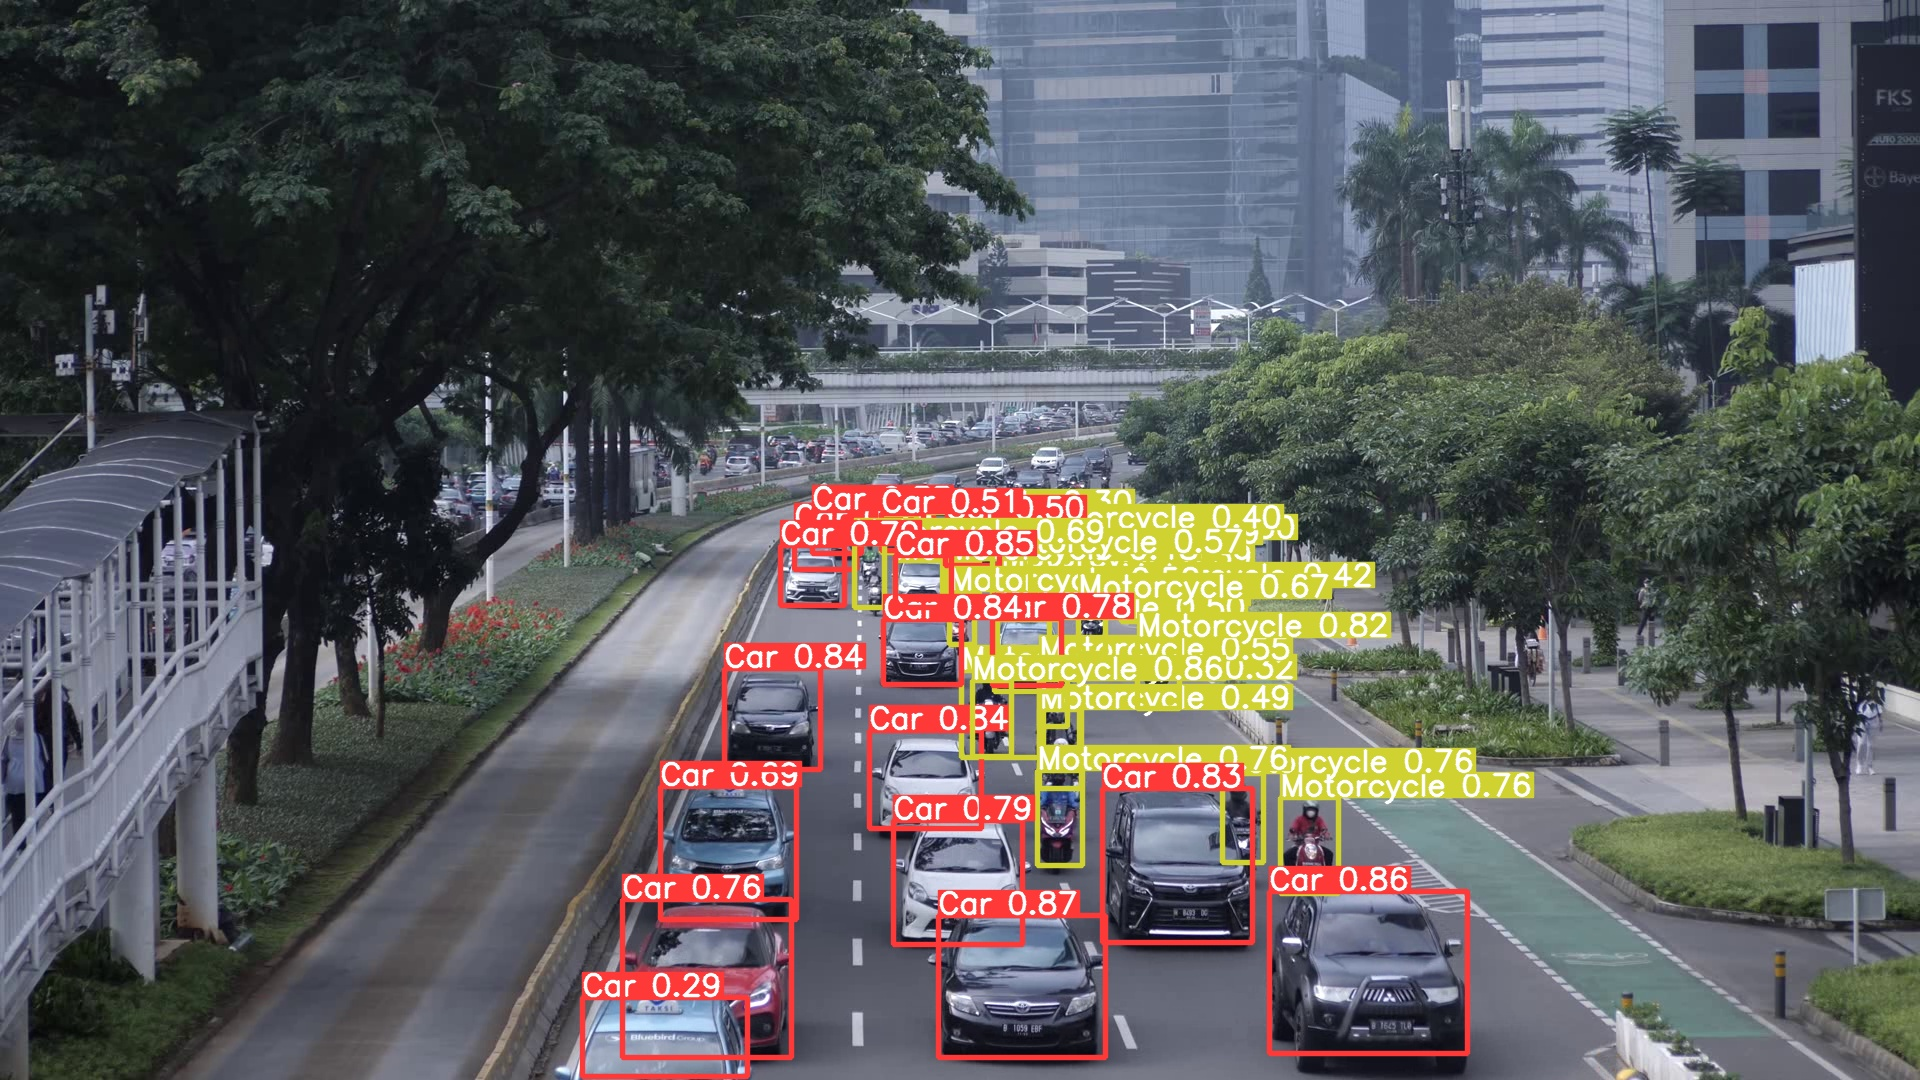

In [14]:
Image(filename='../yolov5/runs/detect/exp/a.jpg', width=640)

Cars: 17
Motorcycles: 23
Total Vehicles: 40

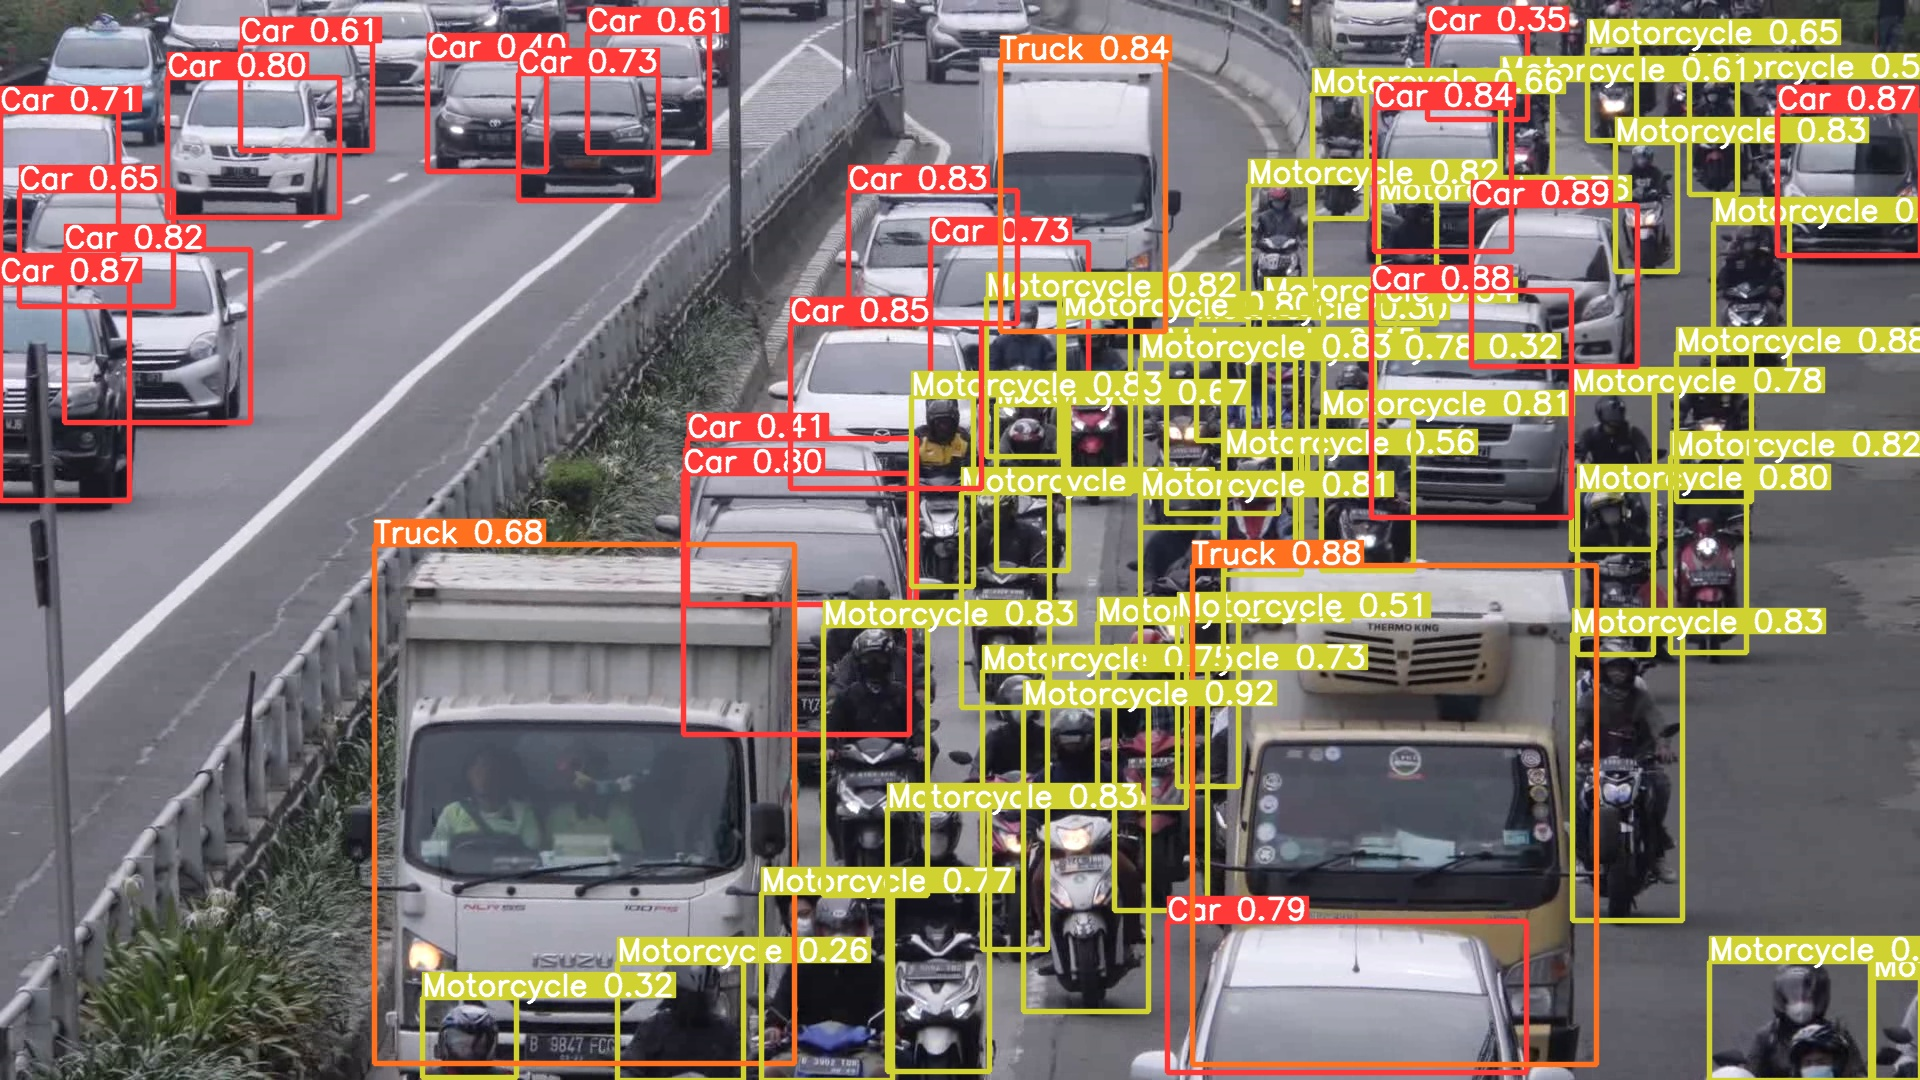

In [16]:
Image(filename='../yolov5/runs/detect/exp2/b.jpg', width=640)

Cars: 20
Trucks: 3
Motorcycles: 39
Total Vehicles: 62